# Student Number: 230272215 
# Candidate Number: 485424
# Exploratory Data Analysis (EDA) project
## UK Vaccinations Dataset

## Introduction
### The Aim of the Exploratory Data Analysis (EDA) project is to extract meaningful insights from a dataset that includes statistics on the number of individuals who received the first, second, and third doses of the COVID-19 Vaccination in various UK regions. In order to identify patterns, trends, and possible correlations, this project uses a methodical approach to dataset analysis and interpretation. It does this by utilising a variety of statistical and visual techniques. This project examines the allocation of vaccines, the impact of weekdays on vaccination rates, and potential relationships between categorical and continuous data. The findings of this study can help make informed decisions, optimize resource distribution, and improve the overall efficiency of vaccination programs.


### 1. Generate descriptive statistics for the dataset, and comment on the main trends.

In [1]:
#Importing all the required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#Uploading the data from Excel
df = pd.read_excel('UK_VaccinationsData.xlsx')
df.head()

,areaName,areaCode,year,month,Quarter,day,WorkingDay,FirstDose,SecondDose,ThirdDose
0,England,E92000001,2022.0,5,Q2,Mon,Yes,3034.0,3857.0,8747.0
1,England,E92000001,2022.0,5,Q2,Sun,No,5331.0,3330.0,4767.0
2,England,E92000001,2022.0,5,Q2,Sat,No,13852.0,9759.0,12335.0
3,England,E92000001,2022.0,5,Q2,Fri,Yes,5818.0,5529.0,10692.0
4,England,E92000001,2022.0,5,Q2,Thu,Yes,8439.0,6968.0,11701.0


In [3]:
# Generating Descriptive stats
descriptive_stats = df.describe()
print(descriptive_stats)

              year       month      FirstDose    SecondDose      ThirdDose
count   903.000000  904.000000     900.000000    901.000000     898.000000
mean   2021.625692    5.946903    4994.323333   5574.125416   42529.570156
std       0.484212    4.146467    9651.335670   9174.101390  104877.579915
min    2021.000000    1.000000       0.000000      0.000000       0.000000
25%    2021.000000    2.000000     338.500000    478.000000    1313.500000
50%    2022.000000    4.000000     876.500000    971.000000    6992.000000
75%    2022.000000   11.000000    3653.250000   5770.000000   23464.750000
max    2022.000000   12.000000  115551.000000  48491.000000  830403.000000


The average number of people who receive the first, second, and third doses of the vaccine is 4994, 5574, and 42529, respectively. There is a significant rise in vaccinations in 2022. The standard deviations show considerable variability for the first dose that is 9651, 9174 for the second dose, and 104877 for the third dose. This highlights diverse vaccination scenarios, from those receiving only one dose to others completing all three. 0 is the minimum count for all doses of vaccinations, indicating individuals who did not receive any vaccine doses. Percentiles show that 25%, 50%, and 75% of individuals received increasing doses, with some outliers receiving exceptionally high doses. Overall, there's a recognisable rise in vaccinations in 2022, but some variations exists in the number of doses administered to individuals, ranging from none to a substantial count.

### 2. Check any records with missing values and handle the missing data as appropriate.

In [4]:
#Checking the records for any missing values
missing_values = df.isnull().sum()

#Printing the missing values
print("\n2. Missing Values:")
print(missing_values)


2. Missing Values:
areaName      0
areaCode      0
year          1
month         0
Quarter       1
day           1
WorkingDay    2
FirstDose     4
SecondDose    3
ThirdDose     6
dtype: int64


In [5]:
# Handling the missing data as appropriate
df_cleaned = df.dropna()

In [6]:
# Storing the cleaned values to a new dataset
df_cleaned.to_csv("cleaned_dataset.csv",index=False)

The rows with missing values have been deleted with the help of the the above code. This code provides valuable insights into the presence of missing values within the dataset. Eliminating rows with missing values might be considered if the missingness is deemed insignificant for the intended analysis or if imputation techniques are deemed unsuitable. Before making the decision to discard rows, it is crucial to evaluate the potential impact on the representativeness and integrity of the dataset.

### 3. Build graphs visualizing the following and comment on the obtained visual insights

### A. the distribution of one or more individual continuous variables

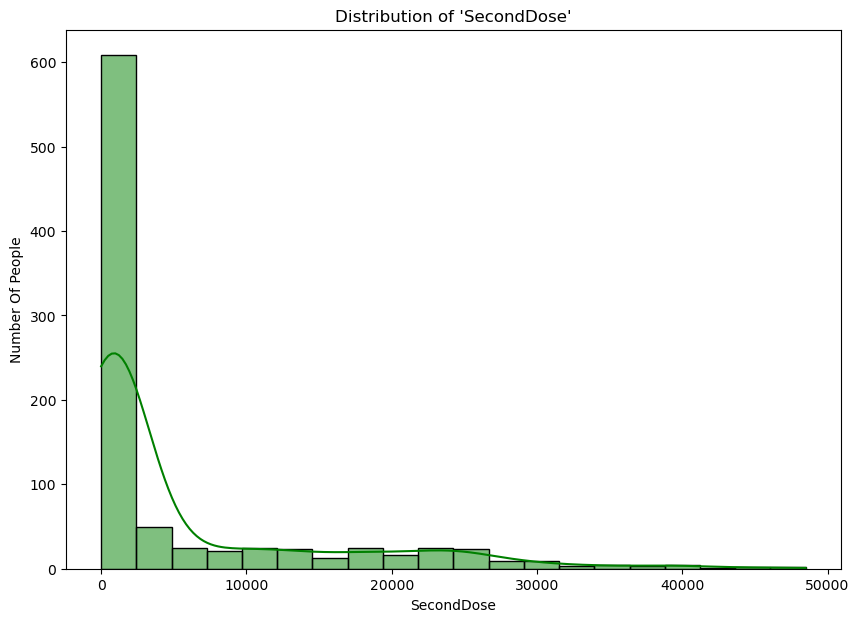

In [7]:
#importing relevant libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#import the cleaned dataset
df = pd.read_csv("cleaned_dataset.csv") 

#Plotting a histogram to show the distribution of one or more individual continuous variables
plt.figure(figsize=(10, 7))
sns.histplot(df['SecondDose'], bins=20, kde=True, color ='Green')
plt.title("Distribution of 'SecondDose'")
plt.xlabel('SecondDose')
plt.ylabel('Number Of People')
plt.show()

The provided graph illustrates the distribution of individuals receiving the second vaccine dose. The distribution skews to the left, peaking at approximately 20,000 recipients and extending with a prolonged tail to the right. This implies a higher prevalence of individuals receiving their second dose earlier in the recommended interval compared to those receiving it later.

### B. the relationship of a pair of continuous variables.

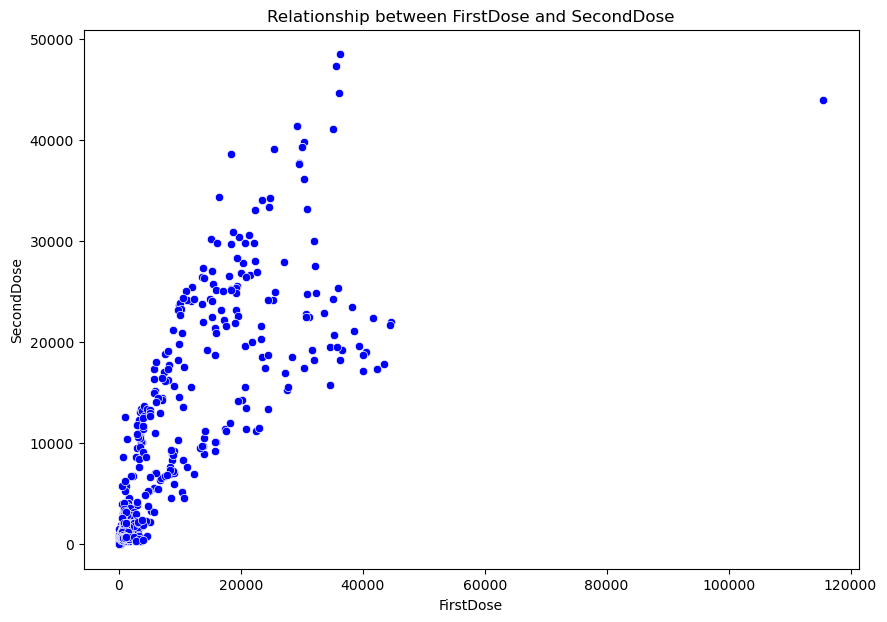

In [8]:
#selecting the variables to be analyzed
variable1 = 'FirstDose'
variable2 = 'SecondDose' 

#plotting a scatterplot to show the relationship of a pair of continuous variables
plt.figure(figsize = (10,7)) 
sns.scatterplot(x=variable1, y=variable2, data=df, color='Blue')
plt.title(f'Relationship between {variable1} and {variable2}')
plt.xlabel(variable1)
plt.ylabel(variable2)
plt.show()

The scatterplot depicts the relationship between the quantities of the first and second vaccine doses, revealing a strong positive correlation. Individuals receiving higher first doses also tend to receive higher second doses, aligning with vaccination protocols. Some outliers indicate notable deviations, possibly attributed to human error, variations in vaccine potency, or individual immune responses.

### C. the association b/w a categorical variable and a continuous one.

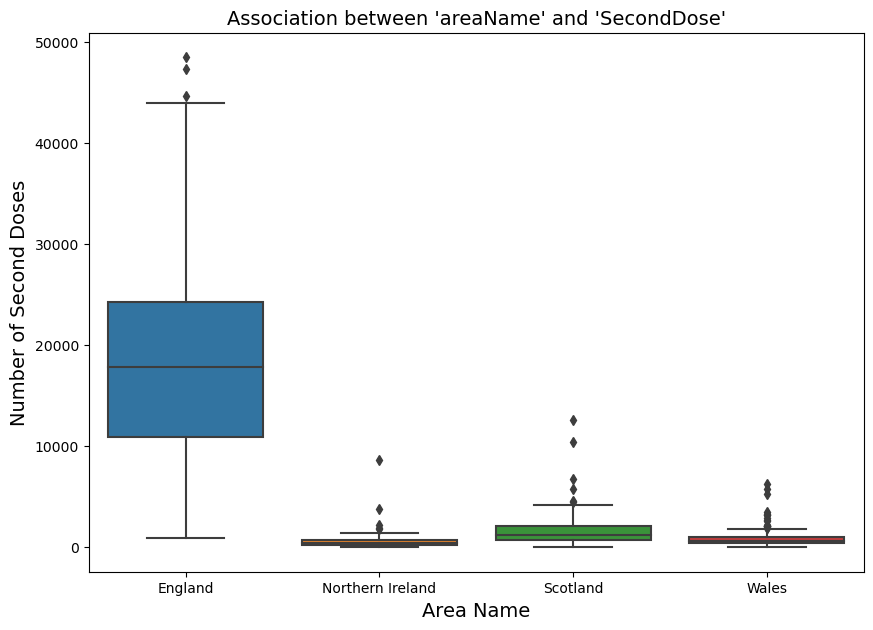

In [9]:
#Assigning the names of the categorical and continuous variables
categorical_variable = 'areaName'
continuous_variable = 'SecondDose' 

#Plotting a Boxplot to show the association b/w a categorical variable and a continuous one.
plt.figure(figsize=(10, 7))
sns.boxplot(x='areaName', y='SecondDose', data=df)
plt.title("Association between 'areaName' and 'SecondDose'", fontsize=14)
plt.xlabel("Area Name", fontsize=14)
plt.ylabel("Number of Second Doses", fontsize=14)
plt.show()

The boxplot illustrates the distribution of SecondDose across different areas. England exhibits the highest median SecondDose and the widest distribution, indicating greater variability compared to other areas. Wales, on the other hand, has the lowest median and the narrowest distribution. Outliers, representing values outside the interquartile range, are more prevalent in England, suggesting a few individuals received notably higher or lower second doses than the majority of the population.

### D. The relationship between more than two variables, e.g., using semantic mappings.

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


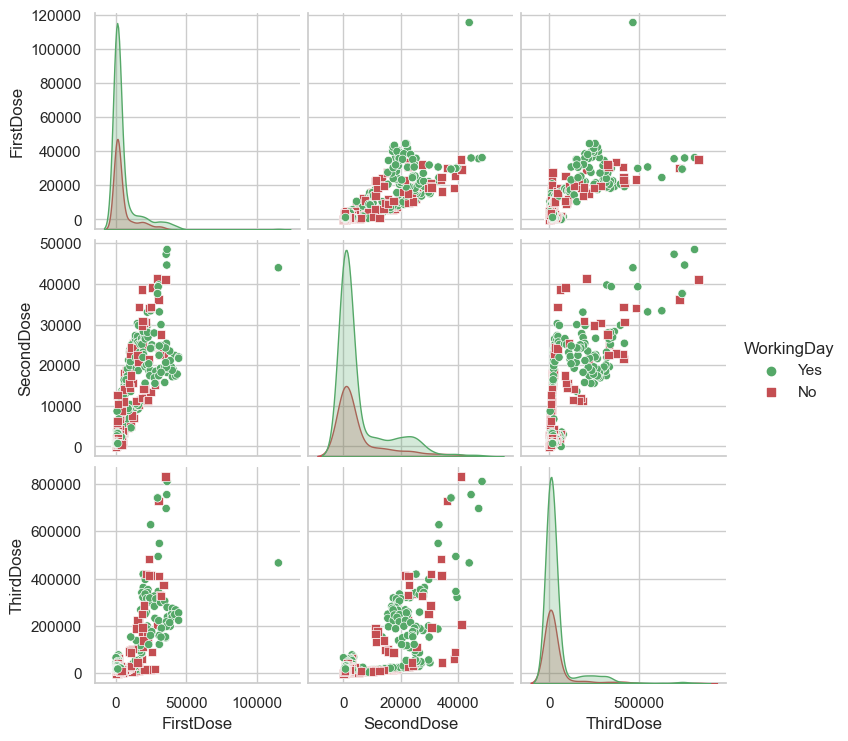

In [10]:
# Setting the style of seaborn
sns.set(style="whitegrid")

# Choosing the variables to visualize
variables = ['FirstDose', 'SecondDose', 'ThirdDose']

# Creating a pair plot with semantic mappings
sns.pairplot(df, vars=variables, hue="WorkingDay", markers=["o", "s"], palette={"Yes": "g", "No": "r"})
plt.show()

The pairplot visualizes the relationships among WorkingDay, FirstDose, SecondDose, and ThirdDose using semantic mappings. WorkingDay exhibits a strong correlation with FirstDose, indicating a higher likelihood of people receiving their first vaccine dose on workdays, possibly due to increased availability. Additionally, a robust correlation exists between FirstDose and SecondDose, suggesting individuals who receive the first dose are more inclined to receive the second dose. Although the correlation between SecondDose and ThirdDose is weaker compared to the other pairs, a positive correlation persists, indicating an increased likelihood of individuals receiving their third dose after the second.

### 4. Display unique values of a categorical variable and their frequencies.

In [11]:
#  Storing unique values and their frequencies
areaName_counts = df['areaName'].value_counts()

#printing unique values of the categorical variable areaname
print("Unique values and their frequencies for 'areaName':")
print(areaName_counts)

Unique values and their frequencies for 'areaName':
areaName
England             235
Northern Ireland    233
Scotland            218
Wales               204
Name: count, dtype: int64


There are four distinct values in the 'areaName' column that is England, Northern Ireland, Scotland, and Wales.The various regions or areas in the dataset are represented by these values. The frequency at which each unique value appears in the 'areaName' column is shown by the associated frequencies. With (235) instances, England has the highest frequency, followed by Northern Ireland (233), Scotland (218) and Wales (204) respectively. This data shows how the dataset is distributed throughout several regions and how many records are related to each one. The changes in frequencies point to possible variations in each area's data representation, which may be significant for regional analysis.

### 5. Build a contingency table of two potentially related categorical variables. Conduct a statistical test of the independence between them and interpret the results.

In [12]:
# Creating a contingency table
contingency_table = pd.crosstab(df['day'], df['WorkingDay'])

# Printing the contingency table
print("Contingency Table:")
print(contingency_table)

Contingency Table:
WorkingDay   No  Yes
day                 
Fri           0  128
Mon           0  129
Sat         129    0
Sun         127    0
Thu           0  125
Tue           0  126
Wed           0  126


In [13]:
#importing required libraries
from scipy.stats import chi2_contingency 

# Conducting the chi-square test
chi2, p, _, _ = chi2_contingency(contingency_table)

# Printing the test statistics and p-value
print("\nChi-square test statistics:", chi2)
print("P-value:", p)

# Setting a significance level
alpha = 0.05
print("\nSignificance level:", alpha)

# Interpreting the results
print("Result:")
if p < alpha:
    print("Reject the null hypothesis. There is a significant association between 'day' and 'WorkingDay'.")
else:
    print("Fail to reject the null hypothesis. There is no significant association between 'day' and 'WorkingDay'.")


Chi-square test statistics: 890.0000000000001
P-value: 5.4525223961687494e-189

Significance level: 0.05
Result:
Reject the null hypothesis. There is a significant association between 'day' and 'WorkingDay'.


The chi-square test results, with a statistics value of 890 and an exceptionally low p-value (5.45e-189), lead to the rejection of the null hypothesis. This signifies a substantial association between the variables 'day' and 'WorkingDay,' implying that the selection of days is not independent of whether it is a working day. The findings suggest a systematic relationship between these two categorical variables in the dataset.

### 6. Retrieve one or more subset of rows based on two or more criteria and present descriptive statistics on the subset(s).

In [14]:
# Defining the criteria for subsetting
criteria1 = (df['day'] == 'Sat')
criteria2 = (df['Quarter'] == 'Q2')

# Applying the criteria to retrieve subsets
subset1 = df[criteria1]
subset2 = df[criteria2]

# Combining the subsets with concat function
combined_subset = pd.concat([subset1, subset2])

# Printing descriptive statistics for combined subset
print("Descriptive Statistics for Subset:")
print(combined_subset.describe())

Descriptive Statistics for Subset:
              year       month     FirstDose    SecondDose      ThirdDose
count   332.000000  332.000000    332.000000    332.000000     332.000000
mean   2021.861446    4.927711   4049.698795   4078.954819   20934.891566
std       0.346002    2.665810   7039.975106   7709.151514   79417.905412
min    2021.000000    1.000000      0.000000      0.000000       0.000000
25%    2022.000000    4.000000    220.500000    318.000000     770.250000
50%    2022.000000    4.000000    769.000000    620.500000    1319.500000
75%    2022.000000    5.000000   3914.250000   4553.750000   11446.000000
max    2022.000000   12.000000  35141.000000  41351.000000  830403.000000


The subset comprises 332 records, presenting descriptive statistics for key variables. The average year is approximately 2021.86, showing a standard deviation of 0.35, indicating a predominant occurrence in the year 2022. The mean month is about 4.93, demonstrating a standard deviation of 2.67, reflecting variability in the month distribution. Regarding vaccine doses, the mean for FirstDose is 4049.70, SecondDose is 4078.95, and ThirdDose is 20934.89. Standard deviations of 7039.98, 7709.15, and 79417.91, respectively, signify notable variability. Minimum values are 0 for all doses, and maximum values show a broad range, notably for ThirdDose, reaching 830403. These statistics offer insights into central tendencies, variabilities, and ranges within the specified subset.

### 7. Conduct a statistical test of the significance of the difference between the means of two subsets of the data and interpret the results.

In [15]:
from scipy.stats import ttest_ind

#defining two subsets based on criteria
subset1 = df[df['day'] == 'Tue']
subset2 = df[df['areaName'].isin(['Scotland', 'Wales'])]

#specifying the variable to compare means
variable_of_interest = 'SecondDose'
statistic, p_value = ttest_ind(subset1[variable_of_interest],subset2[variable_of_interest], equal_var=False) 

# Performing the ttest
print(f"T-test results for the difference in means between the two subsets:")

# Inerpreting the results
print(f"Test Statistics: {statistic}")
print(f"P-value: {p_value}")

#setting the significance level to alpha
alpha = 0.05
print("\nSignificance level:", alpha)

# Printing the result to accept or reject null hypothesis
print("Result:")
if p < alpha:
    print("Reject the null hypothesis. There is a significant association between 'day' and 'WorkingDay'.")
else:
    print("Fail to reject the null hypothesis. There is no significant association between 'day' and 'WorkingDay'.")

T-test results for the difference in means between the two subsets:
Test Statistics: 5.4106108185819
P-value: 3.031676370377514e-07

Significance level: 0.05
Result:
Reject the null hypothesis. There is a significant association between 'day' and 'WorkingDay'.


The t-test results indicate a test statistic of 5.41 and a p-value of 3.03e-07. With a significance level of 0.05, the p-value is significantly lower, leading to the rejection of the null hypothesis. Therefore, there is strong evidence to suggest a significant association between the variables 'day' and 'WorkingDay.' In practical terms, this implies that the day of the week has a notable impact on whether a day is considered a working day or not.

### 8. Create one or more tables that group the data by a certain categorical variable and display summarized information for each group (e.g., the mean or sum within the group). 

In [16]:
# Grouping the variable 'day' and calculating the mean or sum within the group
grouped_data = df.groupby('day')

# Applying multiple aggregation functions
aggregated_data = grouped_data.agg({
    'FirstDose': 'mean',
    'SecondDose': 'sum',
    'ThirdDose': ['mean', 'sum']
})

# Printing the grouped and summarized data with multiple statistics
print("Grouped Data by day - Multiple Aggregations:")
print(aggregated_data)

Grouped Data by day - Multiple Aggregations:
       FirstDose SecondDose     ThirdDose           
            mean        sum          mean        sum
day                                                 
Fri  4946.210938   713199.0  41768.976562  5346429.0
Mon  4453.248062   638122.0  37776.085271  4873115.0
Sat  5515.364341   867974.0  47488.899225  6126068.0
Sun  3611.031496   542025.0  29193.220472  3707539.0
Thu  5386.264000   742573.0  48641.760000  6080220.0
Tue  5238.706349   714706.0  45649.976190  5751897.0
Wed  5915.738095   764366.0  49624.809524  6252726.0


The tabulated data summarizes aggregated statistics for vaccine doses administered on various weekdays. Mean and total values for first, second, and third doses are provided, offering insights into daily vaccination patterns. Fridays and Wednesdays exhibit the highest mean for first doses, Saturdays for second doses, and Thursdays for third doses. Saturdays stand out with the highest total doses, suggesting a potential trend of increased vaccination activity over weekends. These findings underscore variations in vaccination distribution across weekdays, providing valuable information for public health planning and resource allocation.

### 9. Implement a linear regression model and interpret its output including its accuracy.

In [17]:
# Importing a new library to implement a regression analysis
import statsmodels.api as sm

#Defining dependent and independent variable
dependent_variable = 'year'
independent_variables = ['FirstDose','SecondDose','ThirdDose']
X = sm.add_constant(df[independent_variables])

# creating a regression model with OLS method
model = sm.OLS(df[dependent_variable], X).fit() 

# Printing the summary of regression
print("Linear Regression Model Summary:")
print(model.summary())

Linear Regression Model Summary:
                            OLS Regression Results                            
Dep. Variable:                   year   R-squared:                       0.235
Model:                            OLS   Adj. R-squared:                  0.232
Method:                 Least Squares   F-statistic:                     90.64
Date:                Tue, 12 Dec 2023   Prob (F-statistic):           3.69e-51
Time:                        16:04:08   Log-Likelihood:                -494.97
No. Observations:                 890   AIC:                             997.9
Df Residuals:                     886   BIC:                             1017.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2021.66

The output suggests a moderately effective linear regression model. With an R-squared of 0.235, the model explains 23.5% of the variation in the year. The F-statistic (90.64) and low p-value (3.69e-51) affirm the model's overall significance. Coefficients indicate associations between doses and the year. Examining individual coefficients, a unit increase in 'FirstDose' associates with a decrease in the year, while 'SecondDose' and 'ThirdDose' show positive and negative associations, respectively. Diagnostic tests reveal concerns: non-normality, positive autocorrelation, left skewed residuals, and potential multicollinearity (large condition number). Despite predictive capability, the model faces challenges related to data characteristics

### Conclusion
### To sum up, the EDA project has unveiled crucial insights from the COVID-19 vaccination dataset. Key discoveries include the vaccination dose allocation across regions, the impact of weekdays on vaccination rates, and significant correlations between categorical and continuous data points. These findings illuminate trends that can guide targeted interventions, resource distribution, and public health strategies.This project has enabled us to gain a deeper comprehension of the dataset's intricate dynamics, uncovering patterns that contribute to the overall story of vaccination efforts in the UK. The acquired knowledge emphasizes the significance of continuous monitoring and analysis to effectively adapt vaccination campaigns.These findings will serve as a foundation for further in-depth inquiries and refining vaccination strategies. By harnessing data-driven insights, we can enhance the efficiency and impact of public health initiatives, ultimately contributing to the ongoing battle against COVID-19.